<h1>This is my Titanic data analysis project</h1> 
<p>In this project I will investigate this:</p>
<li>How people is distributed among the classes</li>
<li>Survivor rate by class and gender</li>
<li>Fare price by class</li>




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

filename = 'titanic_data.csv'
Titanic_df = pd.read_csv(filename)

## A funcao abaixo dah o sobremone da pessoa

In [2]:
def familie(name): #get the family name
    
    
    return name[:name.find(",")]

In [3]:
family_name = pd.DataFrame({"Family_name" : Titanic_df["Name"].apply(familie)})

## A linha abaixo inseri uma nova coluna com o sobrenome de cada passageiro

In [4]:
Titanic_df = Titanic_df.join(family_name, how='outer')

<h1>How data looks like</h1>

In [5]:
Titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_name
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen


## Como temos dados de idade faltando, esses dados serao desconsiderados da analise, ou seja, as linhas que contem dados de idade faltantes serao desconsideradas. Essa medida reduz a quandidade de dados em 177 o que corresponde a 19.86% dos dados. Essa decisao foi tomada pois acredito que eh melhor que substituir os valores que faltam pela media de idade, pois essa medida distorceria muito os dados visto que a idade media iria ter uma frequencia de ocorencia bem maior que a atual.

In [6]:
Titanic_df = Titanic_df.dropna(axis = 0, subset=["Age"])


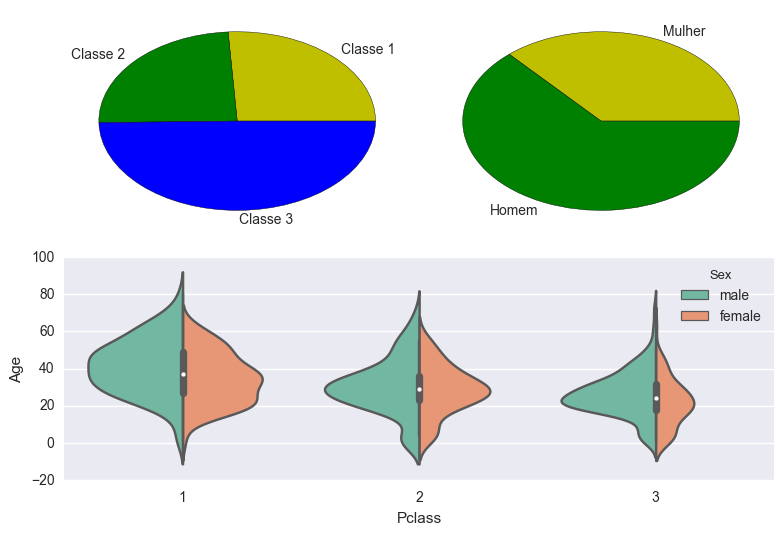

In [48]:
from pandas.tools.plotting import table
grid_size = (4, 2)

plt.subplot2grid(grid_size, (0, 0), rowspan = 2, colspan = 1)

plt.pie(Titanic_df.groupby(["Pclass"])["Sex"].count(),labels=["Classe 1","Classe 2","Classe 3"],colors = ["y","g","b"])


plt.subplot2grid(grid_size, (2, 0), rowspan = 2, colspan = 2)
sns.violinplot(x ="Pclass", y = "Age", hue = "Sex", data = Titanic_df, palette ="Set2",split=True,scale="count")

plt.subplot2grid(grid_size, (0, 1), rowspan = 2, colspan = 1)
plt.pie(Titanic_df.groupby(["Sex"])["Sex"].count(),labels = ["Mulher","Homem"],colors = ["y","g"])



plt.tight_layout()
plt.show()


## Abaixo temos as medias de idade por sexo em cada classe
Classe 3 com a menor media de idade

In [50]:
Titanic_df.groupby(["Pclass","Sex"]).Age.mean()

Pclass  Sex   
1       female    34.611765
        male      41.281386
2       female    28.722973
        male      30.740707
3       female    21.750000
        male      26.507589
Name: Age, dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000DCA4630>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000000006BDA2E8>], dtype=object)

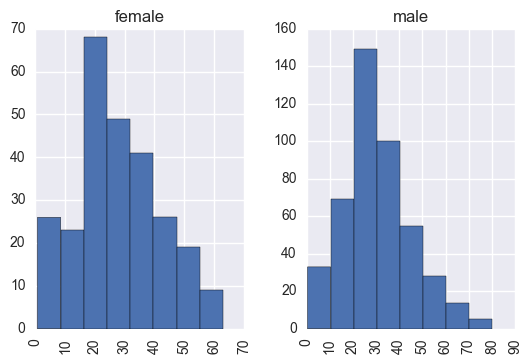

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline

Titanic_df.hist(column="Age",by="Sex",bins=8)


## Abaixo temos o grafico do perfil de preco de passagem
Sendo que as mulheres tiveram maior media de preco de passagem
<br>
Temos valores de preco de passagem 0, porem como nao sei se esses valores nao sao falsos mantive os mesmos.

In [79]:
Titanic_df[Titanic_df.Fare <= 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_name
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S,Leonard
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S,Harrison
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S,Tornquist
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S,Johnson
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S,Johnson
806,807,0,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0,A36,S,Andrews
822,823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0,NaN,S,Reuchlin


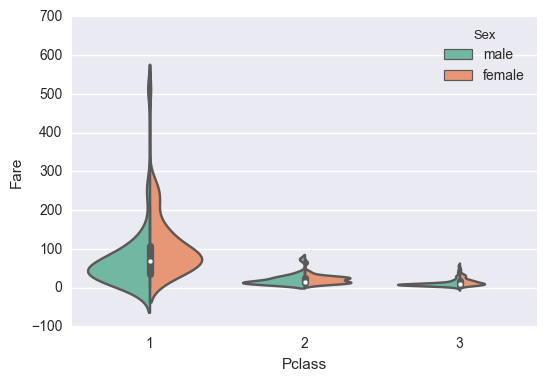

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline
sns.violinplot(x ="Pclass", y = "Fare", hue = "Sex", data = Titanic_df, palette ="Set2",split=True,scale="count")

In [56]:
Titanic_df.groupby(["Sex"]).Fare.mean()

Sex
female    47.582759
male      27.268836
Name: Fare, dtype: float64

In [70]:
Titanic_df.groupby(["Pclass","Sex"]).Fare.describe()

Pclass  Sex          
1       female  count     85.000000
                mean     107.946275
                std       77.158044
                min       25.929200
                25%       57.979200
                50%       83.158300
                75%      135.633300
                max      512.329200
        male    count    101.000000
                mean      71.142781
                std       80.430599
                min        0.000000
                25%       29.700000
                50%       52.000000
                75%       79.200000
                max      512.329200
2       female  count     74.000000
                mean      21.951070
                std       10.906269
                min       10.500000
                25%       13.000000
                50%       22.000000
                75%       26.000000
                max       65.000000
        male    count     99.000000
                mean      21.113131
                std       14.707829
      

## Graficos com dados diversos sobre a taxa de sobrevivencia por classe por genero

## A classe 3 teve a maior taxa de fatalidade

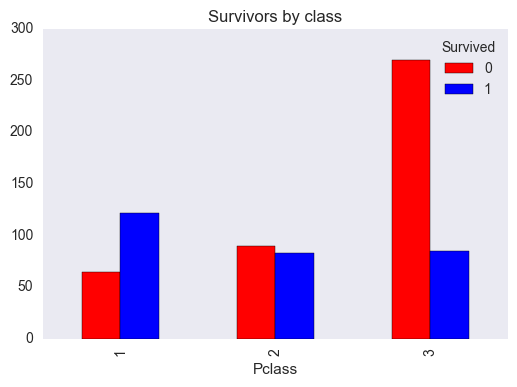

In [71]:
table_survived_pclass = pd.crosstab(Titanic_df.Pclass,
                                    Titanic_df.Survived)

table_survived_pclass.plot(kind='bar', stacked=False, color=['red','blue'], grid=False, title = 'Survivors by class')

## Taxa de sobrevivencia por genero

## A as mulheres teveram a maior taxa de sobrevivencia

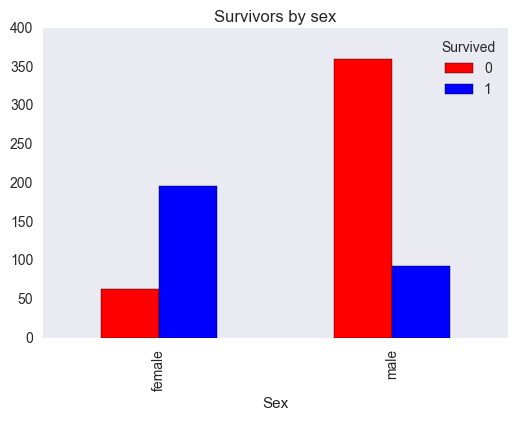

In [72]:
table_survived_pclass = pd.crosstab(Titanic_df.Sex,
                                    Titanic_df.Survived)

table_survived_pclass.plot(kind='bar', stacked=False, color=['red','blue'], grid=False, title = 'Survivors by sex')

In [73]:
def convert_age(ages): # this function divide people by age range;

    
    if ages >= 55:
        ages = "senior age >= 55"
    elif ages >= 30:
        ages = "adult 30 <= age < 55"
    elif ages >= 15:
        ages = "young adult 15 <= age < 30"
    elif ages < 15:
        ages = "kid 0 <= age < 15"
        
    return ages

In [74]:
age_range = Titanic_df["Age"].apply(convert_age)

## Abaixo temos o grafico de sobrevivencia em funcao do grupo de idade

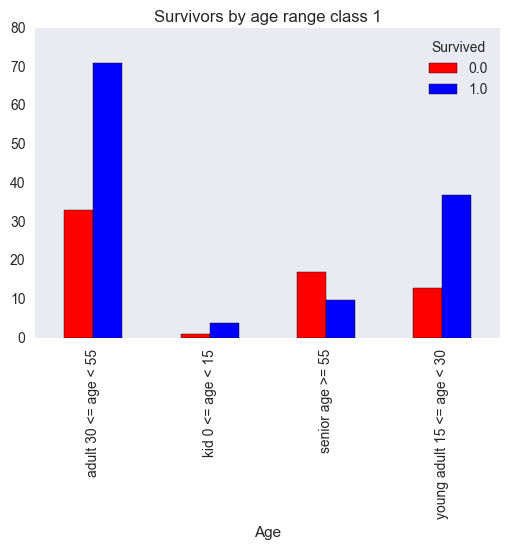

In [75]:
table_survived_pclass = pd.crosstab(age_range,
                                    Titanic_df.Survived.loc[Titanic_df.Pclass == 1])

table_survived_pclass.plot(kind='bar', stacked=False, color=['red','blue'], grid=False, title = 'Survivors by age range class 1')


## Pessoas de 0 a 15 anos da classe 2 tiveram a maior taxa de sobrevivencia

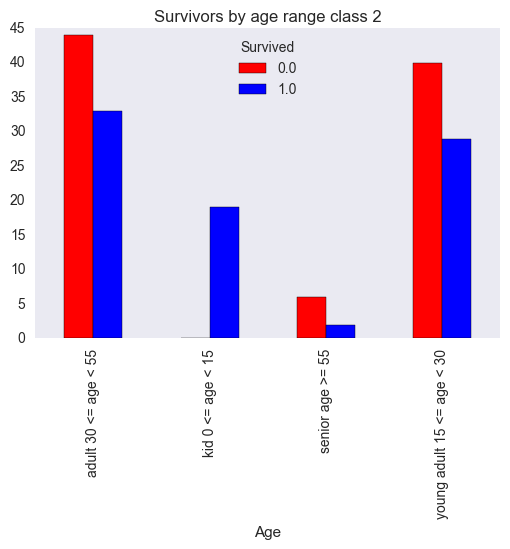

In [76]:
table_survived_pclass = pd.crosstab(age_range,
                                    Titanic_df.Survived.loc[Titanic_df.Pclass == 2])

table_survived_pclass.plot(kind='bar', stacked=False, color=['red','blue'], grid=False, title = 'Survivors by age range class 2')


## Mesmo para a classe 3 as criancas tiveram a maior taxa de sobrevivencia

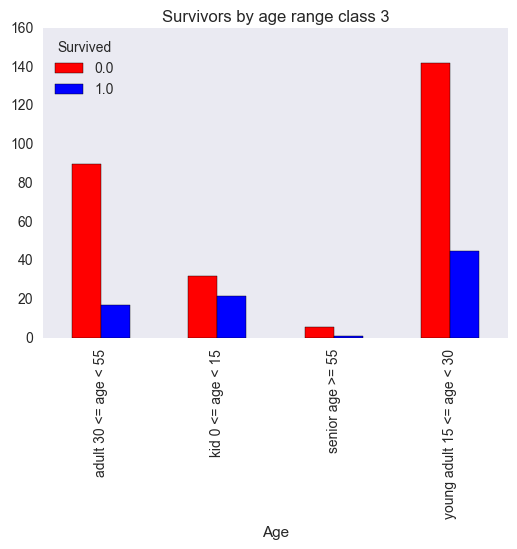

In [77]:
table_survived_pclass = pd.crosstab(age_range,
                                    Titanic_df.Survived.loc[Titanic_df.Pclass == 3])

table_survived_pclass.plot(kind='bar', stacked=False, color=['red','blue'], grid=False, title = 'Survivors by age range class 3')


# Fase de Conclusão

### O estudo acima analisa os dados de 891 passageiros do Titanic, com base nesses dados podemos observar que os passageiros que estavam na classe 1 e 2 tiveram maiores chances de escapar com vida tragedia, bem como mulheres e criancas. Porem os dados nao me permite dizer se isso se deve ao fato de eles pertencerem a essas classes, ou a outro fator nao identificado no estudo. Vale resaltar que essas sao apenas suposicoes sem nenhum valor estatistico. Para validacao sera necessario uma analise estatistica rigorosa.

In [ ]:
<b> isso <\b>
<br>
isso